In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


%matplotlib inline




In [18]:
train= pd.read_csv('DATA/train.csv')

In [19]:
train.sample(9)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
6306,6671_02,Mars,False,F/1279/S,TRAPPIST-1e,31.0,False,1002.0,0.0,NaN,0.0,0.0,Tot Mare,True
2123,2275_01,Mars,False,F/460/P,PSO J318.5-22,36.0,False,241.0,0.0,670.0,0.0,0.0,Mos Tirt,False
7024,7479_01,Mars,True,F/1429/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Muffs Berte,True
7599,8122_01,Europa,False,C/302/S,55 Cancri e,58.0,False,0.0,226.0,0.0,5481.0,NaN,Sadiram Coning,False
2154,2306_05,Europa,True,C/82/P,55 Cancri e,48.0,False,0.0,0.0,0.0,0.0,0.0,Bram Colensid,True
8121,8672_01,Earth,False,G/1406/P,TRAPPIST-1e,40.0,False,21.0,155.0,0.0,267.0,0.0,Cary Rilley,False
7165,7646_02,Europa,False,C/285/S,55 Cancri e,44.0,True,3010.0,26.0,0.0,62.0,904.0,Mahamak Sometery,False
2648,2831_01,Europa,False,D/86/P,TRAPPIST-1e,23.0,False,0.0,824.0,0.0,495.0,1479.0,Weznif Fandomatty,True
6981,7419_02,Earth,False,F/1535/P,TRAPPIST-1e,47.0,False,0.0,61.0,805.0,0.0,6.0,Lerion Bardson,True


In [20]:
def Report(data):

        ### print the shape of the data
        print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset")
        
        ### print the column names in a list
        print("\nFeatures :\n\n", data.columns.tolist())
        
        ### print the number of missing values in the dataset
        print("\nMissing values :\n\n", data.isnull().sum().sort_values(ascending= False))
        
        ### print the percentage of missing values of each individual features in the dataset
        
        print("\nPercentage of Missing Values :\n\n", round(data.isna().sum()/data.isna().count()*100, 3).sort_values(ascending= False))
        
        print("\n The data type of the dataset :\n\n", data.info())
        
        for d in data.columns:
             value_counts= data[d].value_counts()
        print("\n the  value counts of the dataset:\n\n", value_counts)
        
        for d in data.columns:
           value_counts= data[d].value_counts()
           print(f"\n the  value counts for {d} is :\n\n", value_counts)
            
        for d in data.columns:
            unique_value= data[d].unique()
            print(f"\n the unique values for {d} is :\n\n", unique_value)
            
        
        return data.describe().T
        

In [21]:
Report(train)

There are 8693 rows and 14 columns in the dataset

Features :

 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']

Missing values :

 CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
Transported       0
PassengerId       0
dtype: int64

Percentage of Missing Values :

 CryoSleep       2.496
ShoppingMall    2.393
VIP             2.335
HomePlanet      2.312
Name            2.301
Cabin           2.289
VRDeck          2.163
Spa             2.105
FoodCourt       2.105
Destination     2.094
RoomService     2.082
Age             2.059
Transported     0.000
PassengerId     0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 colu

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [426]:
## a function that extract cabin grp and side 
def cabin_condition(x):
    ## try and exception is used to navigate through the nan values
    try:
         u= x.split('/')
         return str(u[0] + u[2])
    except AttributeError as e:
        return x

In [480]:
## make a new copy of the dataframe
train_new= train.copy()

## create a new column cabin_grp from Cabin
train_new['cabin_grp']=train_new['Cabin'].apply(cabin_condition)


In [481]:
train_new['cabin_grp'].unique()

array(['BP', 'FS', 'AS', 'FP', 'GS', nan, 'GP', 'ES', 'DP', 'CS', 'CP',
       'DS', 'BS', 'AP', 'EP', 'TP', 'TS'], dtype=object)

In [482]:
Report(train_new)

There are 8693 rows and 15 columns in the dataset

Features :

 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'cabin_grp']

Missing values :

 CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
cabin_grp       199
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
Transported       0
PassengerId       0
dtype: int64

Percentage of Missing Values :

 CryoSleep       2.496
ShoppingMall    2.393
VIP             2.335
HomePlanet      2.312
Name            2.301
cabin_grp       2.289
Cabin           2.289
VRDeck          2.163
Spa             2.105
FoodCourt       2.105
Destination     2.094
RoomService     2.082
Age             2.059
Transported     0.000
PassengerId     0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeInd

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [751]:
## identify all missing rows in cabin_grp
train_new[train_new['cabin_grp'].isna()]


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_grp
15,0012_01,Earth,False,NaN,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Justie Pooles,False,NaN
93,0101_01,Mars,True,NaN,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Book Trad,True,NaN
103,0110_01,Europa,False,NaN,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Graviph Aloubtled,False,NaN
222,0239_01,Mars,False,NaN,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Diedow Resty,False,NaN
227,0244_01,Mars,True,NaN,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Froos Sad,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,False,NaN,55 Cancri e,NaN,False,NaN,NaN,NaN,NaN,NaN,Naosura Motled,False,NaN
8475,9057_01,Europa,False,NaN,55 Cancri e,NaN,True,NaN,NaN,NaN,NaN,NaN,Coxan Statch,False,NaN
8485,9069_03,Europa,True,NaN,55 Cancri e,NaN,False,NaN,NaN,NaN,NaN,NaN,Bath Brakeng,True,NaN
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Beula Clemondsey,False,NaN


In [484]:
Report(train_new.query("Age<=12"))

There are 806 rows and 15 columns in the dataset

Features :

 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'cabin_grp']

Missing values :

 Name            26
VRDeck          24
VIP             24
CryoSleep       23
ShoppingMall    20
RoomService     20
cabin_grp       17
Cabin           17
HomePlanet      17
Spa             14
FoodCourt       12
Destination     12
Transported      0
Age              0
PassengerId      0
dtype: int64

Percentage of Missing Values :

 Name            3.226
VRDeck          2.978
VIP             2.978
CryoSleep       2.854
ShoppingMall    2.481
RoomService     2.481
cabin_grp       2.109
Cabin           2.109
HomePlanet      2.109
Spa             1.737
FoodCourt       1.489
Destination     1.489
Transported     0.000
Age             0.000
PassengerId     0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries,


 the unique values for Age is :

 [ 0.  1. 10.  7.  2.  4.  8.  3.  9.  6. 11.  5. 12.]

 the unique values for VIP is :

 [False nan]

 the unique values for RoomService is :

 [ 0. nan]

 the unique values for FoodCourt is :

 [ 0. nan]

 the unique values for ShoppingMall is :

 [ 0. nan]

 the unique values for Spa is :

 [ 0. nan]

 the unique values for VRDeck is :

 [ 0. nan]

 the unique values for Name is :

 ['Lyde Brighttt' 'Almary Brantuarez' 'Breney Jacostanley'
 'Mael Brantuarez' 'Terta Mcfaddennon' 'Cinets Datie' 'Kayne Coopelandez'
 'Okulas Tractive' 'Ninaha Leeves' 'Eaturs Datte' nan 'Stald Hewson'
 'Tiney Hewson' 'Thewis Connelson' 'Shaele Mclainez' 'Fanne Mclainez'
 'Oline Handertiz' 'Raque Webstephrey' 'Sallyl Webstephrey'
 'Tance Adavisons' 'Robyny Adavisons' 'Sps Raf' 'Goles Raf' 'Corsh Appie'
 'Tyle Wilsoney' 'Wena Wilsoney' 'Weney Wilsoney' 'Atino Excialing'
 'Hary Mckinsond' 'Bellah Siveduced' 'Guanch Perle' 'Lorian Webstephrey'
 'Cliney Simpsonks' 'Cowns Fiha

,count,mean,std,min,25%,50%,75%,max
Age,806.0,4.516129,3.923063,0.0,1.0,4.0,8.0,12.0
RoomService,786.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FoodCourt,794.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ShoppingMall,786.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Spa,792.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
VRDeck,782.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [485]:
Report(train_new.query("RoomService<= 200").query("cabin_grp == 'CS'"))

There are 364 rows and 15 columns in the dataset

Features :

 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'cabin_grp']

Missing values :

 CryoSleep       13
HomePlanet      10
ShoppingMall     9
VIP              8
Age              8
VRDeck           7
Spa              7
FoodCourt        7
Name             6
Destination      3
cabin_grp        0
Transported      0
RoomService      0
Cabin            0
PassengerId      0
dtype: int64

Percentage of Missing Values :

 CryoSleep       3.571
HomePlanet      2.747
ShoppingMall    2.473
VIP             2.198
Age             2.198
VRDeck          1.923
Spa             1.923
FoodCourt       1.923
Name            1.648
Destination     0.824
cabin_grp       0.000
Transported     0.000
RoomService     0.000
Cabin           0.000
PassengerId     0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries,

 1.1590e+03 2.6900e+02 6.9800e+02 2.8680e+03]

 the unique values for VRDeck is :

 [0.0000e+00 5.0600e+02 9.6540e+03 1.2200e+02 1.0630e+03 8.1880e+03
 3.1390e+03 2.4600e+02 7.9300e+02 9.7200e+02 5.7500e+02 2.0000e+00
 3.8000e+01        nan 2.4530e+03 7.5160e+03 7.5400e+02 6.9400e+02
 6.6100e+02 3.5600e+02 5.3000e+01 3.6040e+03 3.3580e+03 9.1200e+02
 4.0300e+03 1.9600e+02 1.2000e+01 2.3000e+01 5.2000e+01 1.5000e+01
 5.0630e+03 1.5700e+02 1.6300e+02 6.5000e+02 4.5380e+03 9.9000e+01
 1.5610e+03 4.5130e+03 1.3340e+03 2.5640e+03 2.1530e+03 1.4350e+03
 9.1400e+02 1.2570e+03 6.7100e+02 1.2950e+03 4.1680e+03 1.0500e+03
 3.0000e+02 6.2370e+03 1.0000e+00 1.4370e+03 3.4100e+02 8.5000e+01
 1.9370e+03 5.9000e+01 6.1110e+03 2.0100e+02 3.4600e+03 6.0500e+02
 6.5690e+03 1.7800e+02 8.0000e+01 5.8700e+02 9.0000e+00 4.1840e+03
 1.6780e+03 1.0786e+04 1.1480e+03 3.5000e+01 2.9300e+02 5.8400e+02
 1.3840e+03 9.8600e+02 4.9670e+03 3.6000e+02 6.9300e+02 4.0200e+02
 2.3760e+03 2.7990e+03 4.1950e+03 2.2900e+02 

,count,mean,std,min,25%,50%,75%,max
Age,356.0,35.112360,13.206433,0.0,26.0,33.0,44.0,79.0
RoomService,364.0,4.656593,20.848930,0.0,0.0,0.0,0.0,172.0
FoodCourt,357.0,1766.918768,3178.332129,0.0,0.0,14.0,2406.0,17958.0
ShoppingMall,355.0,155.149296,774.958667,0.0,0.0,0.0,0.0,10424.0
Spa,357.0,840.030812,2036.757133,0.0,0.0,0.0,521.0,15238.0
VRDeck,357.0,972.058824,2254.617764,0.0,0.0,0.0,659.0,17074.0


In [486]:

train_new.query("RoomService<= 200").query("cabin_grp == 'CS'").head(13)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_grp
28,0024_01,Europa,True,C/2/S,TRAPPIST-1e,62.0,False,0.0,0.0,NaN,0.0,0.0,Penton Fullided,True,CS
70,0074_01,Europa,False,C/3/S,TRAPPIST-1e,42.0,False,1.0,8397.0,0.0,0.0,506.0,Aldibah Mostedry,True,CS
73,0078_01,Europa,False,C/4/S,TRAPPIST-1e,38.0,False,0.0,5840.0,0.0,321.0,9654.0,Spuri Pokerheed,False,CS
79,0085_01,Europa,True,C/5/S,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,Furudah Ellcefulve,True,CS
129,0139_01,Europa,True,C/6/S,55 Cancri e,35.0,False,0.0,0.0,0.0,0.0,0.0,Charda Myling,True,CS
182,0203_01,Europa,True,C/8/S,TRAPPIST-1e,51.0,False,0.0,0.0,0.0,0.0,0.0,Ancham Heateele,True,CS
184,0206_01,Europa,False,C/9/S,55 Cancri e,NaN,False,2.0,1720.0,12.0,1125.0,122.0,Nuson Brugashed,True,CS
232,0248_01,Europa,False,C/10/S,TRAPPIST-1e,33.0,False,0.0,1.0,0.0,8620.0,1063.0,Genifi Spanxibus,False,CS
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True,CS
263,0289_01,Europa,True,C/12/S,55 Cancri e,19.0,False,0.0,0.0,0.0,0.0,0.0,Furuson Objeciane,True,CS


In [489]:
train_new.query("Age <= 12")


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_grp
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True,GP
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False,ES
24,0020_04,Earth,False,E/0/S,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,Breney Jacostanley,True,ES
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,False,ES
26,0020_06,Earth,False,E/0/S,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Terta Mcfaddennon,False,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8650,9227_04,Earth,True,G/1498/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Robyny Hinglendez,True,GP
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez,False,GP
8653,9231_01,Mars,True,F/1888/P,55 Cancri e,2.0,False,0.0,0.0,0.0,0.0,0.0,Denuts Paie,True,FP
8654,9231_02,Mars,False,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walls Paie,True,FP


In [490]:
Report(train_new.query('HomePlanet == "Earth"' ).query('cabin_grp == "GS"'))

There are 1251 rows and 15 columns in the dataset

Features :

 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'cabin_grp']

Missing values :

 VRDeck          38
Age             33
VIP             32
CryoSleep       31
Name            29
FoodCourt       29
ShoppingMall    28
Spa             26
RoomService     25
Destination     20
cabin_grp        0
Transported      0
Cabin            0
HomePlanet       0
PassengerId      0
dtype: int64

Percentage of Missing Values :

 VRDeck          3.038
Age             2.638
VIP             2.558
CryoSleep       2.478
Name            2.318
FoodCourt       2.318
ShoppingMall    2.238
Spa             2.078
RoomService     1.998
Destination     1.599
cabin_grp       0.000
Transported     0.000
Cabin           0.000
HomePlanet      0.000
PassengerId     0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entrie

 [0.000e+00 7.190e+02 4.000e+00 1.000e+00 6.880e+02       nan 5.620e+02
 8.200e+01 9.700e+01 5.000e+01 1.160e+02 3.000e+00 4.600e+01 6.200e+01
 1.260e+02 1.400e+01 7.510e+02 7.700e+01 1.570e+02 5.210e+02 2.330e+02
 4.120e+02 9.600e+01 3.540e+02 6.000e+00 7.890e+02 4.910e+02 7.300e+01
 4.280e+02 6.120e+02 1.390e+02 3.240e+02 7.620e+02 5.870e+02 1.040e+02
 2.800e+01 5.000e+00 1.810e+02 1.100e+01 4.200e+01 8.000e+00 1.434e+03
 2.310e+02 3.700e+01 5.100e+01 7.700e+02 2.000e+00 5.460e+02 7.010e+02
 2.600e+01 1.508e+03 2.700e+01 8.540e+02 7.000e+00 9.000e+00 3.400e+01
 2.720e+02 8.730e+02 8.520e+02 1.900e+01 4.900e+02 1.300e+02 6.250e+02
 2.540e+02 1.730e+02 4.890e+02 1.500e+01 2.300e+01 1.187e+03 5.170e+02
 4.500e+01 5.710e+02 6.300e+01 2.200e+01 2.320e+02 6.220e+02 3.810e+02
 4.060e+02 7.100e+01 8.600e+01 3.537e+03 1.796e+03 4.370e+02 5.580e+02
 1.620e+03 6.460e+02 3.800e+01 7.150e+02 2.900e+01 3.740e+02 5.950e+02
 8.400e+01 2.820e+02 9.350e+02 1.230e+02 3.300e+02 2.740e+02 4.400e+01
 1.24

,count,mean,std,min,25%,50%,75%,max
Age,1218.0,23.716749,15.518041,0.0,14.0,22.0,33.0,78.0
RoomService,1226.0,65.669657,262.418776,0.0,0.0,0.0,0.0,4518.0
FoodCourt,1222.0,80.375614,325.262332,0.0,0.0,0.0,0.0,5412.0
ShoppingMall,1223.0,64.107114,211.925714,0.0,0.0,0.0,0.0,2778.0
Spa,1225.0,90.864490,386.984985,0.0,0.0,0.0,0.0,5381.0
VRDeck,1213.0,61.685903,258.812086,0.0,0.0,0.0,0.0,4160.0


In [491]:
Report(train_new.query('HomePlanet == "Earth"' ).query('cabin_grp == "FS"'))

There are 790 rows and 15 columns in the dataset

Features :

 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'cabin_grp']

Missing values :

 VIP             23
Destination     19
VRDeck          18
Name            17
FoodCourt       16
RoomService     16
CryoSleep       16
Spa             15
ShoppingMall    14
Age             11
cabin_grp        0
Transported      0
Cabin            0
HomePlanet       0
PassengerId      0
dtype: int64

Percentage of Missing Values :

 VIP             2.911
Destination     2.405
VRDeck          2.278
Name            2.152
FoodCourt       2.025
RoomService     2.025
CryoSleep       2.025
Spa             1.899
ShoppingMall    1.772
Age             1.392
cabin_grp       0.000
Transported     0.000
Cabin           0.000
HomePlanet      0.000
PassengerId     0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries,


 the unique values for ShoppingMall is :

 [2.500e+01 1.510e+02 3.000e+00 1.700e+01 0.000e+00 4.800e+01 1.938e+03
 1.480e+02 9.000e+00 3.100e+01 2.100e+02 4.260e+02 3.130e+02 5.920e+02
 1.359e+03 1.570e+02 4.530e+02 3.300e+01 2.200e+01 8.400e+02 7.950e+02
 1.880e+02 1.820e+02 5.440e+02 8.380e+02 8.310e+02 5.800e+02 2.100e+01
 6.250e+02 3.700e+01 1.000e+00 4.000e+00 2.000e+00 3.200e+01 7.140e+02
 1.000e+01       nan 1.800e+01 4.440e+02 5.400e+02 4.600e+01 4.690e+02
 7.180e+02 9.800e+01 2.670e+02 1.220e+02 8.100e+01 8.280e+02 2.700e+01
 2.630e+02 8.840e+02 6.000e+02 9.570e+02 6.540e+02 1.800e+02 8.430e+02
 1.250e+03 1.061e+03 6.190e+02 6.750e+02 1.260e+02 9.460e+02 3.770e+02
 5.290e+02 3.900e+01 7.300e+01 1.217e+03 6.830e+02 1.300e+01 6.610e+02
 4.100e+01 1.100e+01 6.000e+00 9.080e+02 1.350e+02 8.000e+00 3.800e+01
 5.690e+02 2.570e+02 1.508e+03 5.600e+01 6.930e+02 3.000e+01 8.020e+02
 1.970e+02 6.340e+02 7.000e+00 8.720e+02 7.340e+02 6.100e+01 2.027e+03
 4.460e+02 8.570e+02 6.710e+02 8.

,count,mean,std,min,25%,50%,75%,max
Age,779.0,28.672657,11.900375,2.0,20.0,24.0,36.0,78.0
RoomService,774.0,223.928941,439.893503,0.0,0.0,2.0,255.0,3030.0
FoodCourt,774.0,212.636951,391.139079,0.0,0.0,6.5,241.5,2633.0
ShoppingMall,776.0,216.009021,416.625013,0.0,0.0,4.5,239.5,2728.0
Spa,775.0,208.575484,427.420149,0.0,0.0,4.0,186.0,3409.0
VRDeck,772.0,222.019430,417.288192,0.0,0.0,5.0,300.5,2757.0


In [492]:
train_new['cabin_grp']

0       BP
1       FS
2       AS
3       AS
4       FS
        ..
8688    AP
8689    GS
8690    GS
8691    ES
8692    ES
Name: cabin_grp, Length: 8693, dtype: object

In [494]:
### fill missing values in VIP with False 

In [495]:
## find rows with missing values
common= train_new['ShoppingMall'].isna()
condition= [(train_new['Age'] <=12) & (common)]
fill_with=[0]
train_new['ShoppingMall']= np.select(condition, fill_with, default=train_new['ShoppingMall'].values)



In [496]:
def fill_shopmall(data, target_column: str, cond_column: str, cond_value:int, fill):
    comm= data[target_column].isna()
    cond= [(data[cond_column] <= cond_value) &(common)]
    fill_with= [fill]
    data[target_column]= np.select(cond, fill_with, default= data[target_column].values)

In [497]:
fill_shopmall(train_new, 'ShoppingMall', 'Age', 12, 0)
fill_shopmall(train_new, 'VIP', 'Age', 20, False)

In [742]:
def fill_missing(data, target_column: str, cond_column1: str, cond_column2: str, cond_value1: str, cond_value2, fill):
    common= data[target_column].isna()
    condition= [(data[cond_column1]== cond_value1) & (data[cond_column2]== cond_value2) & (common)]
    fill_with= [fill]
    data[target_column]= np.select(condition, fill_with, default= data[target_column].values)

In [500]:
Report(train_new)

There are 8693 rows and 15 columns in the dataset

Features :

 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'cabin_grp']

Missing values :

 CryoSleep       217
HomePlanet      201
Name            200
cabin_grp       199
Cabin           199
VRDeck          188
ShoppingMall    188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
VIP             123
Transported       0
PassengerId       0
dtype: int64

Percentage of Missing Values :

 CryoSleep       2.496
HomePlanet      2.312
Name            2.301
cabin_grp       2.289
Cabin           2.289
VRDeck          2.163
ShoppingMall    2.163
Spa             2.105
FoodCourt       2.105
Destination     2.094
RoomService     2.082
Age             2.059
VIP             1.415
Transported     0.000
PassengerId     0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeInd

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8505.0,173.320635,604.043588,0.0,0.0,0.0,26.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [501]:
### at ages greater than 40  and cabin_grp EP, GP VIP is false
### at ages greater than 40 and cabin_grp AP,BP, BS, CS , CP HomePlanet is Europa
### at ages greater than 40  and cabin_grp GS, GP homeplanet is Earth

In [741]:
def fill_miss(data, target_column: str, cond_column1: str, cond_column2: str, cond_value1: str, cond_value2, fill):
    common= data[target_column].isna()
    condition= [(data[cond_column1]>= cond_value1) & (data[cond_column2]== cond_value2) & (common)]
    fill_with= [fill]
    data[target_column]= np.select(condition, fill_with, default= data[target_column].values)

In [504]:

fill_miss(train_new, 'HomePlanet', "Age", 'cabin_grp', 40, 'BP', 'Europa')
fill_miss(train_new, 'HomePlanet', "Age", 'cabin_grp', 40, 'BS', 'Europa')
fill_miss(train_new, 'HomePlanet', "Age", 'cabin_grp', 40, 'CS', 'Europa')
fill_miss(train_new, 'HomePlanet', "Age", 'cabin_grp', 40, 'CP', 'Europa')
fill_miss(train_new, 'HomePlanet', "Age", 'cabin_grp', 40, 'GS', 'Earth')
fill_miss(train_new, 'HomePlanet', "Age", 'cabin_grp', 40, 'GP', 'Earth')





In [748]:
Report(train_new.query("HomePlanet =='Earth'"))


There are 4707 rows and 15 columns in the dataset

Features :

 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'cabin_grp']

Missing values :

 VRDeck          196
Spa             196
ShoppingMall    196
FoodCourt       196
RoomService     196
Age             196
Name            111
cabin_grp        95
Cabin            95
VIP              35
Transported       0
Destination       0
CryoSleep         0
HomePlanet        0
PassengerId       0
dtype: int64

Percentage of Missing Values :

 VRDeck          4.164
Spa             4.164
ShoppingMall    4.164
FoodCourt       4.164
RoomService     4.164
Age             4.164
Name            2.358
cabin_grp       2.018
Cabin           2.018
VIP             0.744
Transported     0.000
Destination     0.000
CryoSleep       0.000
HomePlanet      0.000
PassengerId     0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Ind

,count,mean,std,min,25%,50%,75%,max
Age,4511.0,26.034360,14.270507,0.0,18.0,23.0,34.0,79.0
RoomService,4511.0,134.095212,376.019709,0.0,0.0,0.0,26.0,6256.0
FoodCourt,4511.0,133.491022,364.182192,0.0,0.0,0.0,25.0,5412.0
ShoppingMall,4511.0,129.969186,341.014225,0.0,0.0,0.0,23.0,4581.0
Spa,4511.0,138.530814,408.837038,0.0,0.0,0.0,28.5,5577.0
VRDeck,4511.0,134.904899,366.703691,0.0,0.0,0.0,26.5,5321.0


In [749]:
Report(train_new.query("Destination == 'TRAPPIST-1e'").query('HomePlanet == "Earth"'))

There are 3279 rows and 15 columns in the dataset

Features :

 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'cabin_grp']

Missing values :

 VRDeck          166
Spa             166
ShoppingMall    166
FoodCourt       166
RoomService     166
Age             166
Name             76
cabin_grp        65
Cabin            65
VIP              25
Transported       0
Destination       0
CryoSleep         0
HomePlanet        0
PassengerId       0
dtype: int64

Percentage of Missing Values :

 VRDeck          5.063
Spa             5.063
ShoppingMall    5.063
FoodCourt       5.063
RoomService     5.063
Age             5.063
Name            2.318
cabin_grp       1.982
Cabin           1.982
VIP             0.762
Transported     0.000
Destination     0.000
CryoSleep       0.000
HomePlanet      0.000
PassengerId     0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Ind

,count,mean,std,min,25%,50%,75%,max
Age,3113.0,26.447800,14.347592,0.0,18.0,24.0,35.0,79.0
RoomService,3113.0,146.815612,385.767933,0.0,0.0,0.0,41.0,5049.0
FoodCourt,3113.0,145.722133,382.007949,0.0,0.0,0.0,36.0,5412.0
ShoppingMall,3113.0,137.920013,351.156854,0.0,0.0,0.0,33.0,4581.0
Spa,3113.0,153.582075,423.692047,0.0,0.0,0.0,49.0,5577.0
VRDeck,3113.0,144.817539,381.763643,0.0,0.0,0.0,45.0,5321.0


In [750]:
Report(train_new.query("Destination == 'PSO J318.5-22'").query('HomePlanet == "Mars"'))

There are 51 rows and 15 columns in the dataset

Features :

 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'cabin_grp']

Missing values :

 cabin_grp       1
VRDeck          1
Spa             1
ShoppingMall    1
FoodCourt       1
RoomService     1
VIP             1
Age             1
Cabin           1
Transported     0
Name            0
Destination     0
CryoSleep       0
HomePlanet      0
PassengerId     0
dtype: int64

Percentage of Missing Values :

 cabin_grp       1.961
VRDeck          1.961
Spa             1.961
ShoppingMall    1.961
FoodCourt       1.961
RoomService     1.961
VIP             1.961
Age             1.961
Cabin           1.961
Transported     0.000
Name            0.000
Destination     0.000
CryoSleep       0.000
HomePlanet      0.000
PassengerId     0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 69 to 7635
Data 

,count,mean,std,min,25%,50%,75%,max
Age,50.0,36.16,11.777460,13.0,29.25,34.5,42.50,71.0
RoomService,50.0,366.62,483.395258,0.0,0.00,182.5,623.50,2042.0
FoodCourt,50.0,117.58,321.304236,0.0,0.00,0.0,0.75,1575.0
ShoppingMall,50.0,365.08,512.097083,0.0,0.00,65.0,655.00,2387.0
Spa,50.0,115.52,295.852986,0.0,0.00,0.0,35.50,1777.0
VRDeck,50.0,63.52,195.760708,0.0,0.00,0.0,1.00,833.0


In [697]:
Report(train_new.query("cabin_grp == 'EP'").query('HomePlanet == "Earth"'))


There are 199 rows and 15 columns in the dataset

Features :

 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'cabin_grp']

Missing values :

 CryoSleep       7
Name            6
VRDeck          6
Spa             6
ShoppingMall    6
FoodCourt       6
RoomService     6
Age             6
Destination     6
cabin_grp       0
Transported     0
VIP             0
Cabin           0
HomePlanet      0
PassengerId     0
dtype: int64

Percentage of Missing Values :

 CryoSleep       3.518
Name            3.015
VRDeck          3.015
Spa             3.015
ShoppingMall    3.015
FoodCourt       3.015
RoomService     3.015
Age             3.015
Destination     3.015
cabin_grp       0.000
Transported     0.000
VIP             0.000
Cabin           0.000
HomePlanet      0.000
PassengerId     0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 128 to 8606
Da

,count,mean,std,min,25%,50%,75%,max
Age,193.0,28.279793,12.536383,2.0,20.0,24.0,36.0,66.0
RoomService,193.0,202.663212,363.512187,0.0,0.0,1.0,223.0,1656.0
FoodCourt,193.0,167.953368,338.590650,0.0,0.0,1.0,204.0,2251.0
ShoppingMall,193.0,221.305699,462.329760,0.0,0.0,2.0,320.0,4581.0
Spa,193.0,148.564767,330.961269,0.0,0.0,0.0,71.0,1658.0
VRDeck,193.0,222.901554,390.437569,0.0,0.0,6.0,249.0,1679.0


In [505]:
### when cabin_grp is AS, AP, BS, BP,  CS, CP, TP fill homeplanet with Europa
### when cabin_grp is FS, GS, GP, EP fill with Earth
### when cabin_grp is ES and destination is Trasspit-1-e fill with mars
### when cabin_grp is ES and destination is pso fill with Earth
### when cabin_grp is ES and destination is 55 cancrr fill with Europa
### when cabin_grp is DP, DS and destination is pso j and Trasspit- 1-e  fill with mars

### when cabin_grp is DP, DS and destination is 55 cancrr fill with Europa


## when cabin_grp is AS, AP,  FS, FP, ES,EP,  DP , CS, CP, DS, TS fill cryo_sleep with False
## when cabin_grp is BS fill cryo_sleep with True
## when cabin_grp is GS, GP fill cryo_sleep with True except when destination is trassppit -1-e

## fill destination with TRAPPIST-1e


array(['BP', 'FS', 'AS', 'FP', 'GS', nan, 'GP', 'ES', 'DP', 'CS', 'CP',
       'DS', 'BS', 'AP', 'EP', 'TP', 'TS'], dtype=object)

In [743]:
train_new['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [707]:
def fill_missing1(data, target_column: str, cond_column1: str,  cond_value1: str, fill):
    """
       Argumnet data: dataframe, target_column: column to be filled, cond_column1 , cond_column2, fill: value 
    """
    common= data[target_column].isna()
    condition= [(data[cond_column1]== cond_value1)  & (common)]
    fill_with= [fill]
    data[target_column]= np.select(condition, fill_with, default= data[target_column].values)

In [757]:
fill_missing1(train_new, 'HomePlanet', 'cabin_grp', 'AS', 'Europa')
fill_missing1(train_new, 'HomePlanet', 'cabin_grp', 'AP', 'Europa')
fill_missing1(train_new, 'HomePlanet', 'cabin_grp', 'BS', 'Europa')
fill_missing1(train_new, 'HomePlanet', 'cabin_grp', 'BP', 'Europa')
fill_missing1(train_new, 'HomePlanet', 'cabin_grp', 'CS', 'Europa')
fill_missing1(train_new, 'HomePlanet', 'cabin_grp', 'CP', 'Europa')
fill_missing1(train_new, 'HomePlanet', 'cabin_grp', 'TP', 'Europa')
fill_missing1(train_new, 'HomePlanet', 'cabin_grp', 'FS', 'Earth')
fill_missing1(train_new, 'HomePlanet', 'cabin_grp', 'GS', 'Earth')
fill_missing1(train_new, 'HomePlanet', 'cabin_grp', 'GP', 'Earth')

fill_missing1(train_new, 'HomePlanet', 'cabin_grp', 'EP', 'Earth')
fill_missing(train_new, 'HomePlanet', 'cabin_grp', 'Destination', 'ES', 'TRAPPIST-1e', 'Mars')
fill_missing(train_new, 'HomePlanet', 'cabin_grp', 'Destination', 'ES', 'PSO J318.5-22', 'Earth' )
fill_missing(train_new, 'HomePlanet', 'cabin_grp', 'Destination', 'ES', '55 Cancri e', 'Europa' )
fill_missing(train_new, 'HomePlanet', 'cabin_grp', 'Destination', 'ES', '55 Cancri e', 'Europa' )
fill_missing(train_new, 'HomePlanet', 'cabin_grp', 'Destination', 'DS', '55 Cancri e', 'Europa' )
fill_missing(train_new, 'HomePlanet', 'cabin_grp', 'Destination', 'DP', '55 Cancri e', 'Europa' )

## fill  the remaining missing values in  Hompelanet with Mars
train_new['HomePlanet']= train_new['HomePlanet'].fillna('Mars')

fill_missing1(train_new, 'CryoSleep', 'cabin_grp', 'BS', True)
fill_missing(train_new, 'CryoSleep', 'cabin_grp', 'Destination', 'GP', '55 Cancri e', True )
fill_missing(train_new, 'CryoSleep', 'cabin_grp', 'Destination', 'GS', '55 Cancri e', True )
## fill the remaining missing values with False
train_new['CryoSleep'] = train_new['CryoSleep'].fillna(False)

## fill VIP the misiing values with False
train_new['VIP']= train_new['VIP'].fillna(False)

## fill Destination with TRAPPIST-1e
train_new['Destination']= train_new['Destination'].fillna('TRAPPIST-1e')

## Drop rows with no cabin_grp
train_new= train_new[train_new.cabin_grp.notnull()]

C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [753]:
Report(train_new)


There are 8494 rows and 15 columns in the dataset

Features :

 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'cabin_grp']

Missing values :

 Name            198
ShoppingMall    179
VRDeck          178
Spa             178
FoodCourt       178
RoomService     178
Age             178
VIP             111
cabin_grp         0
Transported       0
Destination       0
Cabin             0
CryoSleep         0
HomePlanet        0
PassengerId       0
dtype: int64

Percentage of Missing Values :

 Name            2.331
ShoppingMall    2.107
VRDeck          2.096
Spa             2.096
FoodCourt       2.096
RoomService     2.096
Age             2.096
VIP             1.307
cabin_grp       0.000
Transported     0.000
Destination     0.000
Cabin           0.000
CryoSleep       0.000
HomePlanet      0.000
PassengerId     0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Ind

,count,mean,std,min,25%,50%,75%,max
Age,8316.0,28.742785,14.385763,0.0,20.0,27.0,37.0,79.0
RoomService,8316.0,217.863757,636.818257,0.0,0.0,0.0,42.0,9920.0
FoodCourt,8316.0,451.295815,1611.289714,0.0,0.0,0.0,65.0,29813.0
ShoppingMall,8315.0,171.019844,605.812769,0.0,0.0,0.0,22.0,23492.0
Spa,8316.0,298.749519,1101.076140,0.0,0.0,0.0,52.0,22408.0
VRDeck,8316.0,301.168951,1144.100330,0.0,0.0,0.0,40.0,24133.0


In [508]:
def line_plot(data_frame, variable1:str, variable2:str):
    """
      Arguments data_frame, variable1 and variable2
      
      returns-- a line plot
    """
    sns.set_palette(sns.color_palette("hls", 8))
    fig, axes= plt.subplots(1,1, sharex=True, sharey=False)
    fig.set_figheight(7)
    fig.set_figwidth(15)
    fig.set_facecolor('white')
    sns.lineplot(y=variable2, x= variable1,  data=data_frame)


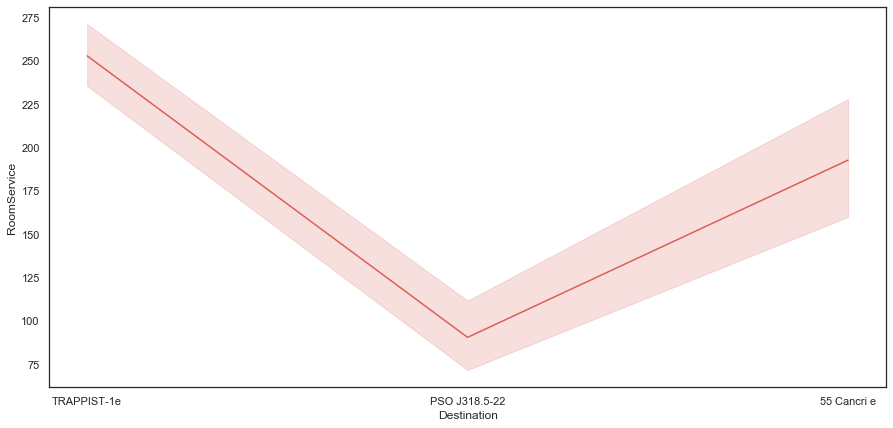

In [509]:
line_plot(train_new, 'Destination', 'RoomService')

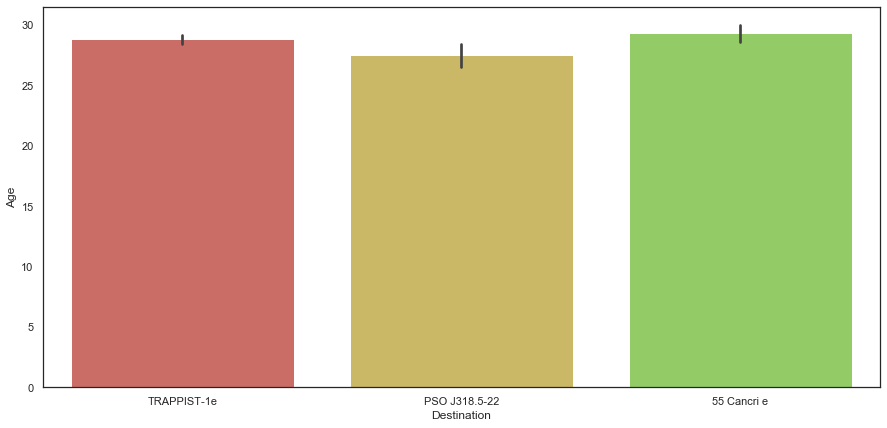

In [510]:
bar_plot(train_new, 'Destination', 'Age')

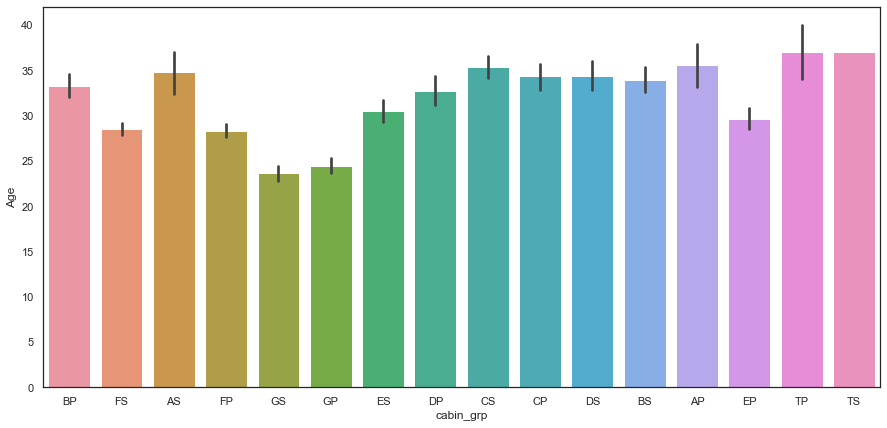

In [511]:
bar_plot(train_new, 'cabin_grp', 'Age')

In [512]:
train_new['VIP'].unique()

array([False, True, nan], dtype=object)

In [513]:
def bar_plot(data_frame, variable1:str, variable2:str):
    """
       Argument -- data_frame, variable1 (x_axis) and variable2(y-axis)
       
       returns a bar plot
    """

    sns.set_palette(sns.color_palette("hls", 8))
    fig, axes= plt.subplots(1,1, sharex=True, sharey=False)
    fig.set_figheight(7)
    fig.set_figwidth(15)
    fig.set_facecolor('white')
    sns.barplot(y=variable2, x= variable1,  data=data_frame)


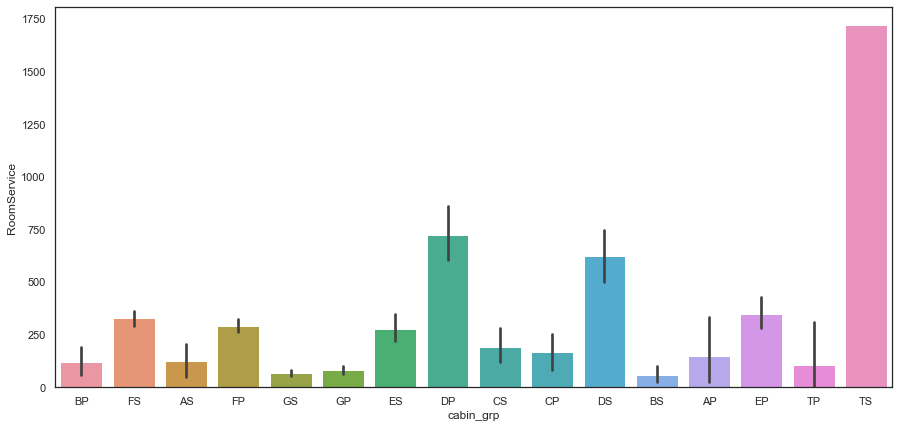

In [514]:
bar_plot(train_new, 'cabin_grp', 'RoomService')

In [515]:
def dist_box(data):
    ### this function plots a combineg univariate graph for numerical data
    ### in order to check the spread of central tendency, dispersion and outliers of the data
    Name= data.name.upper()
    fig, (ax_box, ax_dis)= plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios':(0.3, 0.9)}, figsize=(9,5))
    mean= data.mean()
    median= data.median()
    mode= data.mode().to_list()[0]
    sns.set_theme(style ='white')
    fig.suptitle('Spread Of Data For '+ Name , fontsize=14, fontweight='bold' )
    sns.boxplot(x=data, showmeans=True, orient ='h', color='green', ax= ax_box)
    ## remove the x axis from the boxplot
    ax_box.set(xlabel ='')
    ## for better visualisation. this will set the background to white
    sns.despine(top=True, right=True, left=True) # to remove the sideline from the graph
    sns.distplot(data, kde=True, color='blue', ax=ax_dis)
    ax_dis.axvline(mean, color='black', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [516]:
x=train_new.select_dtypes(include= 'float64').columns.to_list()
x

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: 

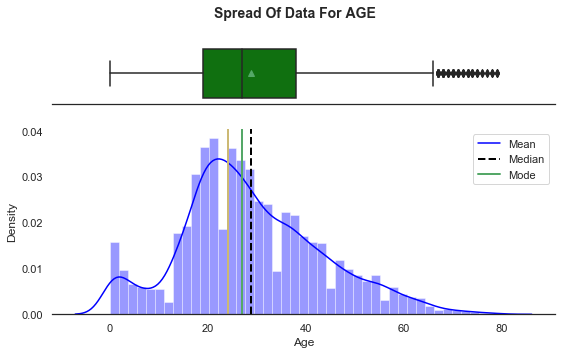

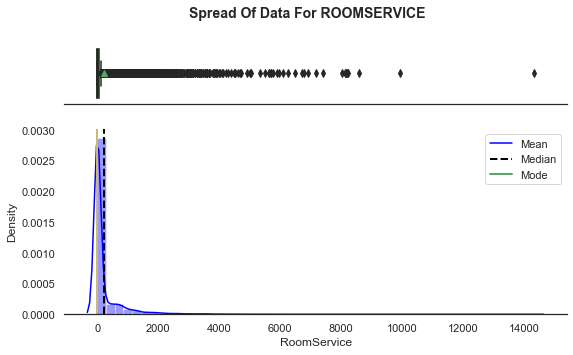

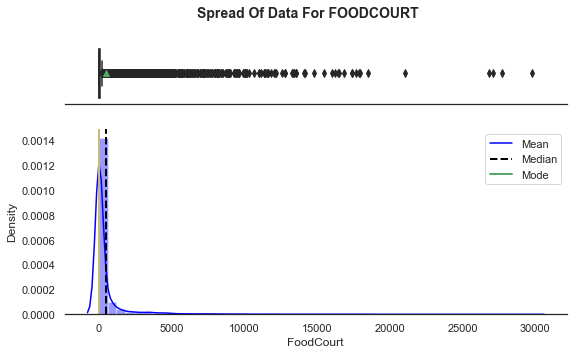

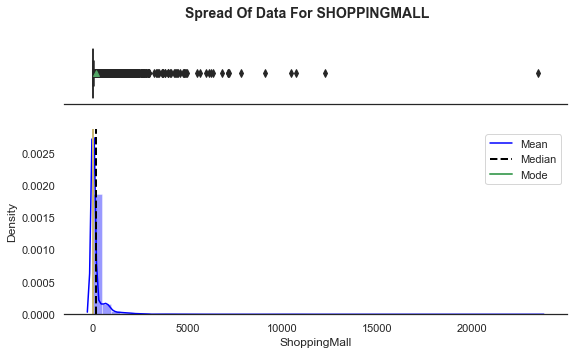

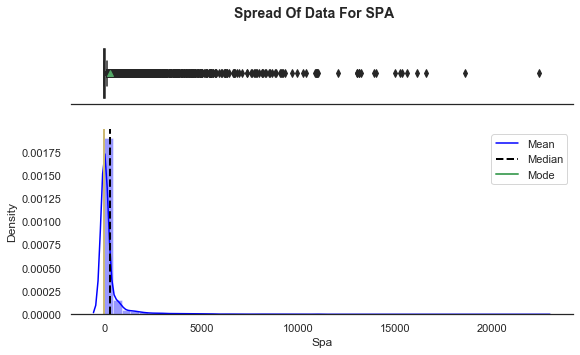

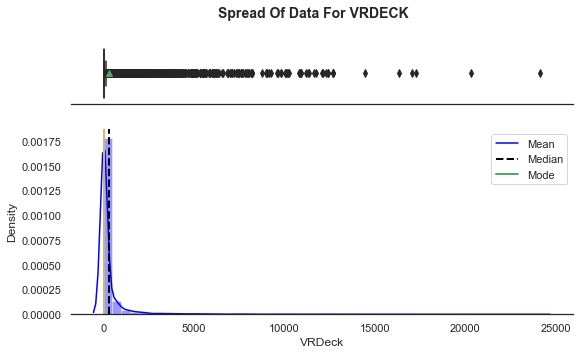

In [464]:
### select all qualitative columns to check the spread

list_col= train_new.select_dtypes(include='float64').columns.to_list()
for i in range(len(list_col)):
    dist_box(train_new[list_col[i]])

In [465]:
## fill missing values in the numeric data

### fill missing values with median as median is not affected by outliers

In [543]:
Report(train_new.querytrain_new[train_new['cabin_grp'].notnull()])

There are 8494 rows and 15 columns in the dataset

Features :

 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'cabin_grp']

Missing values :

 CryoSleep       210
Name            198
HomePlanet      180
ShoppingMall    179
VRDeck          178
Spa             178
FoodCourt       178
RoomService     178
Age             178
Destination     178
VIP             111
cabin_grp         0
Transported       0
Cabin             0
PassengerId       0
dtype: int64

Percentage of Missing Values :

 CryoSleep       2.472
Name            2.331
HomePlanet      2.119
ShoppingMall    2.107
VRDeck          2.096
Spa             2.096
FoodCourt       2.096
RoomService     2.096
Age             2.096
Destination     2.096
VIP             1.307
cabin_grp       0.000
Transported     0.000
Cabin           0.000
PassengerId     0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Ind

,count,mean,std,min,25%,50%,75%,max
Age,8316.0,28.742785,14.385763,0.0,20.0,27.0,37.0,79.0
RoomService,8316.0,217.863757,636.818257,0.0,0.0,0.0,42.0,9920.0
FoodCourt,8316.0,451.295815,1611.289714,0.0,0.0,0.0,65.0,29813.0
ShoppingMall,8315.0,171.019844,605.812769,0.0,0.0,0.0,22.0,23492.0
Spa,8316.0,298.749519,1101.076140,0.0,0.0,0.0,52.0,22408.0
VRDeck,8316.0,301.168951,1144.100330,0.0,0.0,0.0,40.0,24133.0


In [547]:
Report(train_new.query("cabin_grp == 'AS'"))

There are 139 rows and 15 columns in the dataset

Features :

 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'cabin_grp']

Missing values :

 VIP             5
Name            4
CryoSleep       3
VRDeck          2
Spa             2
ShoppingMall    2
FoodCourt       2
RoomService     2
Age             2
Destination     2
HomePlanet      2
cabin_grp       0
Transported     0
Cabin           0
PassengerId     0
dtype: int64

Percentage of Missing Values :

 VIP             3.597
Name            2.878
CryoSleep       2.158
VRDeck          1.439
Spa             1.439
ShoppingMall    1.439
FoodCourt       1.439
RoomService     1.439
Age             1.439
Destination     1.439
HomePlanet      1.439
cabin_grp       0.000
Transported     0.000
Cabin           0.000
PassengerId     0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 2 to 8492
Data

,count,mean,std,min,25%,50%,75%,max
Age,137.0,34.642336,14.075812,0.0,27.0,32.0,44.0,73.0
RoomService,137.0,123.218978,480.180798,0.0,0.0,0.0,0.0,3340.0
FoodCourt,137.0,1773.167883,3602.891187,0.0,0.0,392.0,1883.0,29813.0
ShoppingMall,137.0,90.649635,411.938845,0.0,0.0,0.0,0.0,3374.0
Spa,137.0,567.868613,1070.886369,0.0,0.0,26.0,642.0,6715.0
VRDeck,137.0,767.343066,1633.747679,0.0,0.0,6.0,636.0,10888.0


In [754]:
train_new.groupby(['HomePlanet', 'cabin_grp',  'Destination'])['FoodCourt'].median()


HomePlanet  cabin_grp  Destination  
Earth       EP         55 Cancri e       3.0
                       PSO J318.5-22     0.0
                       TRAPPIST-1e       1.0
            ES         55 Cancri e      10.5
                       PSO J318.5-22     4.5
                                        ... 
Mars        FP         PSO J318.5-22     0.0
                       TRAPPIST-1e       0.0
            FS         55 Cancri e       0.0
                       PSO J318.5-22     0.0
                       TRAPPIST-1e       0.0
Name: FoodCourt, Length: 63, dtype: float64

In [759]:
## group by HomePlanet,  cabin_grp and destination then fill with median
train_new['FoodCourt']= train_new.groupby(['HomePlanet','cabin_grp', 'Destination'])['FoodCourt'].apply(lambda x: x.fillna(x.median()))

train_new['Spa']= train_new.groupby(['HomePlanet',  'cabin_grp', 'Destination'])['Spa'].apply(lambda x: x.fillna(x.median()))

train_new['VRDeck']= train_new.groupby(['HomePlanet', 'cabin_grp', 'Destination'])['VRDeck'].apply(lambda x: x.fillna(x.median()))

train_new['ShoppingMall']= train_new.groupby(['HomePlanet', 'cabin_grp', 'Destination'])['ShoppingMall'].apply(lambda x: x.fillna(x.median()))

train_new['RoomService']= train_new.groupby(['HomePlanet', 'cabin_grp', 'Destination'])['RoomService'].apply(lambda x: x.fillna(x.median()))

train_new['Age']= train_new.groupby(['HomePlanet', 'cabin_grp', 'Destination'])['Age'].apply(lambda x: x.fillna(x.median()))


In [760]:
Report(train_new)

There are 8494 rows and 15 columns in the dataset

Features :

 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'cabin_grp']

Missing values :

 Name            198
ShoppingMall      1
cabin_grp         0
Transported       0
VRDeck            0
Spa               0
FoodCourt         0
RoomService       0
VIP               0
Age               0
Destination       0
Cabin             0
CryoSleep         0
HomePlanet        0
PassengerId       0
dtype: int64

Percentage of Missing Values :

 Name            2.331
ShoppingMall    0.012
cabin_grp       0.000
Transported     0.000
VRDeck          0.000
Spa             0.000
FoodCourt       0.000
RoomService     0.000
VIP             0.000
Age             0.000
Destination     0.000
Cabin           0.000
CryoSleep       0.000
HomePlanet      0.000
PassengerId     0.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Ind

,count,mean,std,min,25%,50%,75%,max
Age,8494.0,28.692960,14.247957,0.0,20.0,27.0,37.0,79.0
RoomService,8494.0,214.253002,631.224296,0.0,0.0,0.0,37.0,9920.0
FoodCourt,8494.0,442.618083,1595.499206,0.0,0.0,0.0,59.0,29813.0
ShoppingMall,8493.0,167.542211,599.906709,0.0,0.0,0.0,20.0,23492.0
Spa,8494.0,292.589593,1090.291711,0.0,0.0,0.0,46.0,22408.0
VRDeck,8494.0,294.915823,1132.854545,0.0,0.0,0.0,33.0,24133.0
